<a href="https://colab.research.google.com/github/hansuho113/Machine_learning/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%EA%B8%B0%EB%A7%90%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(60000, 784).astype(np.float32)/255.0
X_test = X_test.reshape(10000, 784).astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

4423680/4422102 [==============================] - 0s 0us/step


In [24]:
es = EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=50)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

In [25]:
n_input=784
h1=1024
h2=512
h3=512
h4=512
n_output=10

model = Sequential()
model.add(Dense(units=h1, activation='relu', input_shape=(n_input, )))
model.add(Dense(units=h2, activation='relu'))
model.add(Dense(units=h3, activation='relu'))
model.add(Dense(units=h4, activation='relu'))
model.add(Dense(units=n_output, activation='softmax'))


In [26]:
model.compile(loss='mean_squared_error',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

hist = model.fit(X_train, y_train,
               batch_size=128, epochs=500,
               validation_data=(X_test, y_test),
               verbose=2, callbacks=[es, mc])

res = model.evaluate(X_test, y_test, verbose=0)

print(f"Accuracy: {res[1]*100}")

Epoch 1/500
469/469 - 2s - loss: 0.0262 - accuracy: 0.8134 - val_loss: 0.0218 - val_accuracy: 0.8509
Epoch 2/500
469/469 - 1s - loss: 0.0201 - accuracy: 0.8591 - val_loss: 0.0203 - val_accuracy: 0.8573
Epoch 3/500
469/469 - 1s - loss: 0.0184 - accuracy: 0.8730 - val_loss: 0.0196 - val_accuracy: 0.8651
Epoch 4/500
469/469 - 1s - loss: 0.0169 - accuracy: 0.8842 - val_loss: 0.0190 - val_accuracy: 0.8702
Epoch 5/500
469/469 - 1s - loss: 0.0160 - accuracy: 0.8900 - val_loss: 0.0185 - val_accuracy: 0.8708
Epoch 6/500
469/469 - 1s - loss: 0.0154 - accuracy: 0.8948 - val_loss: 0.0185 - val_accuracy: 0.8737
Epoch 7/500
469/469 - 1s - loss: 0.0146 - accuracy: 0.8992 - val_loss: 0.0181 - val_accuracy: 0.8753
Epoch 8/500
469/469 - 1s - loss: 0.0142 - accuracy: 0.9023 - val_loss: 0.0182 - val_accuracy: 0.8707
Epoch 9/500
469/469 - 1s - loss: 0.0139 - accuracy: 0.9054 - val_loss: 0.0171 - val_accuracy: 0.8829
Epoch 10/500
469/469 - 1s - loss: 0.0134 - accuracy: 0.9095 - val_loss: 0.0177 - val_accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


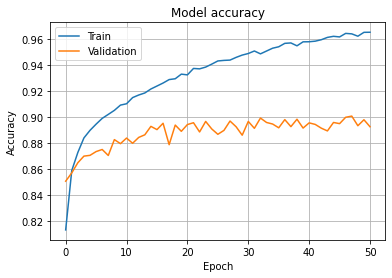

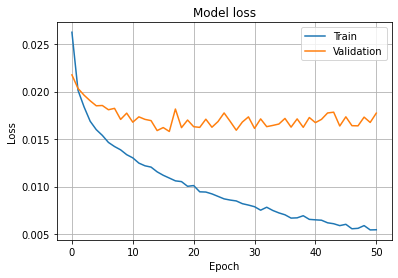

In [28]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel('Accuracy')
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc='upper_left')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model loss")
plt.ylabel('Loss')
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()
plt.show()

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


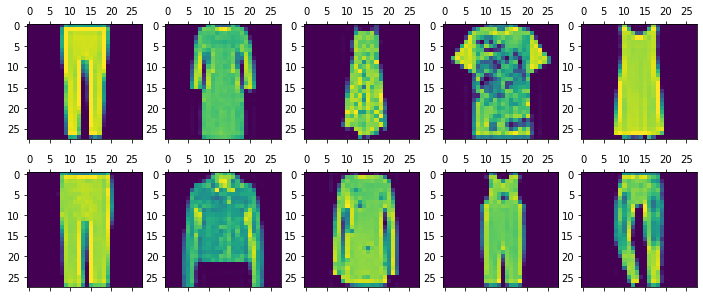

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

random_pick = np.random.randint(low=0, high=10000, size=10)
random_pick

figure = plt.figure()
figure.set_size_inches(12, 5)

axes = []
for i in range(1, 11):
    axes.append(figure.add_subplot(2, 5, i))
tmp_list = []
for i in range(10):
    tmp = X_train[60000 - random_pick[i]]
    tmp = tmp.reshape(-1, 28)
    tmp_list.append(tmp)
print(y_test[random_pick])

for i in range(10):
    axes[i].matshow(tmp_list[i])